In [6]:
# Import libarys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [4]:
# Import the dataset
root = '/Users/Haydn/Documents/Code/Jupyter/Machine Learning A-Z/1.0 - Example Data/'
data_file = root + 'Part 2 - Regression/Decision Tree Regression/Position_Salaries.csv'
dataset = pd.read_csv(data_file)
'''
Random Forest Regresion is a version of ensemble learning. Take the same
algorithm multiple times and put them together to combine the results.

Take a random subset of points in your data sets and build a decision tree
from that subset. Do this a few times so you've many different decision trees.

Then when you want to predict a value for Y you run it though all your trees
and take the average of the results.

TLDR; basically loads of decision trees are used to predict new values.
-----------------------------------------------------------------------------
So this data set shows the levels of employess and the salary you
get at that level.

So now when we hire emplyees we can check them against our salary curve.
E.g - An Regional Manager with two yrs experience on their way to Partner.
      We can say they're 6.5 and check the salary on our graph.
''' 
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


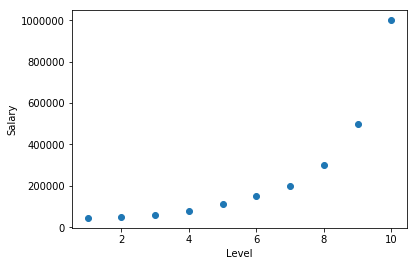

In [5]:
# Splitting features and outcomes
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:].values

plt.scatter(x, y)
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [20]:
# Create the random forest regression
no_of_trees = 100
regression = RandomForestRegressor(n_estimators=no_of_trees, random_state=0) # random state is just here to make guy in video, gives no randomness to the results
regression.fit(x, y[:, 0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [21]:
# Lets make some predictions...
yrs_exp = [[6.5]]

regression.predict(yrs_exp)

array([158300.])

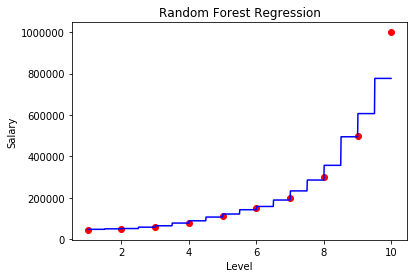

In [22]:
# Visualise the results
# As we're using more decision trees then we see more steps
# as some trees vote for some levels and some for others.
# More trees don't mean more steps as they start to converge towards
# the same averages.
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color="red")
plt.plot(x_grid, regression.predict(x_grid), color="blue")
plt.title("Random Forest Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()